In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
path = 'data/telco-customer-churn.csv'

In [3]:
# wrangle data

def wrangle(data_path):
    # load data into DataFrame
    df = pd.read_csv(data_path)
    
    # Set target variable to integer values
    df.loc[df['Churn'] == 'No', 'churn'] = 0
    df.loc[df['Churn'] == 'Yes', 'churn'] = 1
    
    # drop old target variable
    df.drop(columns=["Churn"], inplace=True)
    
    # set index of DataFrame to `customerID`
    df.index = df['customerID']
    
    # drop columns
    df.drop(columns='customerID', inplace=True)
    
    return df

In [4]:
df = wrangle(path)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0.0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


# What percentage of users have churned?

In [6]:
churn = len(df[df['churn'] == 1])
percent_churn = round(churn / len(df) * 100, 2)
percent_churn

26.54

# Split Data

In [7]:
# Split Data
X = df.drop(columns='churn')
y = df['churn']

In [8]:
X.shape, y.shape

((7043, 19), (7043,))

In [9]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [10]:
from sklearn.model_selection import train_test_split
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
9944-AEXBM,Male,0,No,No,32,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.65,2664.3
4431-EDMIQ,Female,0,Yes,Yes,7,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,75.70,554.05
8738-JOKAR,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,One year,Yes,Mailed check,67.70,2882.25
8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.6
1154-HYWWO,Male,0,No,No,38,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Mailed check,70.60,2708.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0650-BWOZN,Female,1,No,No,18,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,73.55,1359.45
3923-CSIHK,Female,1,Yes,No,50,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71.05,3444.85
5519-TEEUH,Male,0,No,Yes,33,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.15,682.15


# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [13]:
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [14]:
# Create sklearn pipeline to automate encoding, scaling, and training

model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression()
)

model_lr.fit(X_train, y_train)

/Users/andrewlee/.local/share/virtualenvs/random-ZZJCgzib/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/andrewlee/.local/share/virtualenvs/random-ZZJCgzib/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'Partner', 'Dependents',
                                     'PhoneService', 'MultipleLines',
                                     'InternetService', 'OnlineSecurity',
                                     'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'Contract',
                                     'PaperlessBilling', 'PaymentMethod',
                                     'TotalCharges'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [15]:
# Churn probability
np.set_printoptions(suppress=True)
model_lr.predict_proba(X_test)

array([[0.57541245, 0.42458755],
       [0.70247102, 0.29752898],
       [0.99796296, 0.00203704],
       ...,
       [0.99980193, 0.00019807],
       [0.99987648, 0.00012352],
       [0.99982348, 0.00017652]])

In [16]:
# Churn Predictions
model_lr.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
# Accuracy Score
model_lr.score(X_test, y_test)

0.7792760823278921

# Confusion Matrix, ROC Curve

In [18]:
from sklearn.metrics import plot_confusion_matrix, classification_report

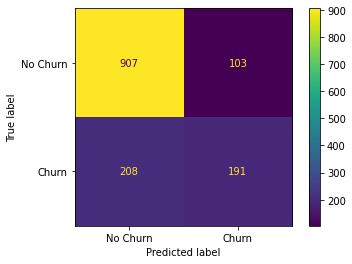

In [19]:
plot_confusion_matrix(model_lr, X_test, y_test, values_format='.0f',
                      display_labels=['No Churn', 'Churn'])

In [20]:
print(classification_report(y_test, model_lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      1010
         1.0       0.65      0.48      0.55       399

    accuracy                           0.78      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [21]:
from sklearn.metrics import roc_curve, plot_roc_curve

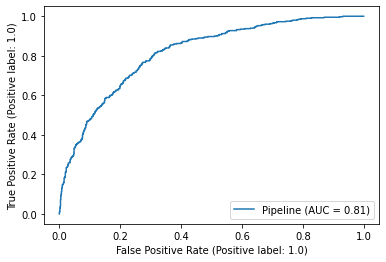

In [22]:
lr = plot_roc_curve(model_lr, X_test, y_test)

In [23]:
# Classify each user as churned or not churned
classify_df = X_test.copy()
np.set_printoptions(suppress=True)
classify_df["Churn_Probability"] = model_lr.predict_proba(X_test)[:,1]
classify_df['Churn'] = model_lr.predict(X_test)

In [24]:
classify_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Probability,Churn
customerID,,,,,,,,,,,,,,,,,,,,,
9944-AEXBM,Male,0,No,No,32,Yes,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.65,2664.3,0.424588,0.0
4431-EDMIQ,Female,0,Yes,Yes,7,Yes,No,DSL,Yes,Yes,...,Yes,Yes,No,Month-to-month,Yes,Electronic check,75.70,554.05,0.297529,0.0
8738-JOKAR,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,...,Yes,No,Yes,One year,Yes,Mailed check,67.70,2882.25,0.002037,0.0
8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.6,0.037950,0.0
1154-HYWWO,Male,0,No,No,38,Yes,No,DSL,Yes,Yes,...,Yes,Yes,No,One year,No,Mailed check,70.60,2708.2,0.004430,0.0


In [25]:
# Permutation Feature Importance
from sklearn.inspection import permutation_importance

In [26]:
perm_imp = permutation_importance(
    model_lr, 
      X_test, 
      y_test, 
      n_repeats=5, 
      n_jobs=-1, 
      random_state=42
)

<AxesSubplot:title={'center':'Permutation Feature Importances'}>

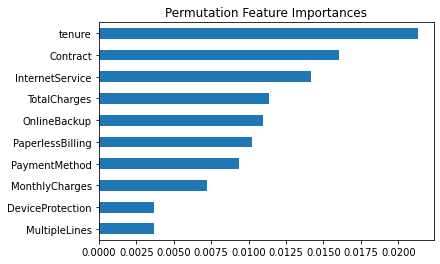

In [27]:
data = {'imp_mean': perm_imp['importances_mean'],
        'imp_std': perm_imp['importances_std']}

perm_df = pd.DataFrame(data, index=X_test.columns).sort_values('imp_mean')
perm_df['imp_mean'].tail(10).plot(kind='barh', title='Permutation Feature Importances')

In [28]:
perm_df

,imp_mean,imp_std
gender,-0.003833,0.001883
SeniorCitizen,-0.001703,0.001237
Dependents,-0.000994,0.001773
TechSupport,0.001278,0.003218
PhoneService,0.001278,0.001761
StreamingTV,0.001845,0.005759
StreamingMovies,0.002981,0.002782
OnlineSecurity,0.003265,0.003097
Partner,0.003265,0.003436
MultipleLines,0.003691,0.002124


# Simplify LogReg Model

In [29]:
# Model 2: Simplified Model (Fewer features)
df2 = df[['tenure', 'InternetService', 'churn']]
df2.head()

,tenure,InternetService,churn
customerID,,,
7590-VHVEG,1,DSL,0.0
5575-GNVDE,34,DSL,0.0
3668-QPYBK,2,DSL,1.0
7795-CFOCW,45,DSL,0.0
9237-HQITU,2,Fiber optic,1.0


In [30]:
# Split Data
X2 = df2.drop(columns='churn')
y2 = df2['churn']

In [31]:
# Train Test Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

In [32]:
# Create model pipeline
model_lr2 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression()
)

model_lr2.fit(X_train2, y_train2)

/Users/andrewlee/.local/share/virtualenvs/random-ZZJCgzib/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['InternetService'], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [33]:
# Model score
model_lr2.score(X_test2, y_test2)

0.7934705464868701

In [34]:
# Permutation Feature Importances for new model
perm_imp2 = permutation_importance(
    model_lr2, 
      X_test2, 
      y_test2, 
      n_repeats=5, 
      n_jobs=-1, 
      random_state=42
)

<AxesSubplot:title={'center':'Permutation Feature Importances'}>

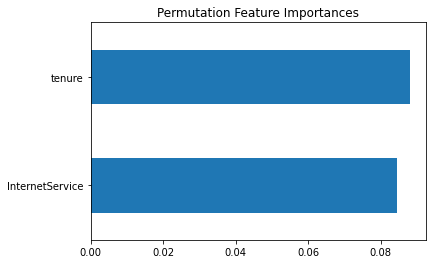

In [35]:
data = {'imp_mean': perm_imp2['importances_mean'],
        'imp_std': perm_imp2['importances_std']}

perm_df2 = pd.DataFrame(data, index=X_test2.columns).sort_values('imp_mean')
perm_df2['imp_mean'].tail(10).plot(kind='barh', title='Permutation Feature Importances')

# Analysis:
Model Performance ~79% accuracy. Precision and Recall are low for predicting churn, ~65% and ~60%, respectively. The most important features in predicting user churn are `tenure` and `InternetService` (Found using Permutation Feature Importances technique). Dropping columns that don't contribute to the model (features that contribute less than 1% increase to model performance) improved the accuracy of the model by simplifying it. If I wanted to improve the accuracy score further, I would tune the hyperparameters of Logistic Regression/Random Forest using Randomized Search to find important hyperparameters, then follow it up with brute force Grid Search on specific parameters to optimize further.

For the purpose of this analysis, incremental accuracy improvements is not the goal. Understanding the patterns in the data and finding the most important features in correctly predicting churned users is the goal. That way these features can be focused on when diving deeper into the analysis, visualizing, and communicating these insights using Tableau.

Next Step is to import this dataset into Tableau and focus on the top features (`tenure` and `InternetService`) that contribute to the accuracy of the model to try to find and visualize the relationships between these features and `Churn`. This will help us understand which users will likely churn in the future and how to create initiatives around decreasing churn and increasing the LTV of users.


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

In [37]:
model_rf = make_pipeline(
    OneHotEncoder(),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)

model_rf.fit(X_train, y_train)

/Users/andrewlee/.local/share/virtualenvs/random-ZZJCgzib/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'Partner', 'Dependents',
                                     'PhoneService', 'MultipleLines',
                                     'InternetService', 'OnlineSecurity',
                                     'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'Contract',
                                     'PaperlessBilling', 'PaymentMethod',
                                     'TotalCharges'])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [38]:
model_rf.predict_proba(X_test)

array([[0.39, 0.61],
       [0.78, 0.22],
       [0.81, 0.19],
       ...,
       [0.99, 0.01],
       [0.3 , 0.7 ],
       [0.97, 0.03]])

In [39]:
model_rf.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

In [40]:
model_rf.score(X_test, y_test)

0.7821149751596878

In [41]:
# 2nd Random Forest Model
model_rf2 = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    RandomForestClassifier(random_state=42, n_jobs=-2)
)

model_rf2.fit(X_train2, y_train2)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-2, random_state=42))])

In [42]:
model_rf2.score(X_test2, y_test2)

0.801277501774308

# Random EDA Practice

In [43]:
df_gender = df.groupby(['gender']).mean()
df_gender

,SeniorCitizen,tenure,MonthlyCharges,churn
gender,,,,
Female,0.162844,32.244553,65.204243,0.269209
Male,0.161463,32.495359,64.327482,0.261603


### isin()

In [44]:
internet = ['Fiber optic', 'DSL']
df.loc[df['InternetService'].isin(internet)].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0.0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0.0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0


# Churn if tenure < 10 and 
# Contract = Month-to-month, One year and 
# Churn=1

In [45]:
contract = ['Month-to-month', 'One year']
new_df = df[(df['tenure'] <= 10) & (df['Contract'].isin(contract)) & (df['churn'] == 1)]
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1.0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1.0
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1.0
4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,1.0
8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1.0


# Neural Network

In [46]:
X_train.shape, y_train.shape

((5634, 19), (5634,))

In [47]:
X_train.shape[1]

19

In [48]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
0203-HHYIJ,Male,0,No,No,25,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),25.30,676.35
8189-HBVRW,Female,0,No,No,53,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,No,Electronic check,90.80,4921.2
8985-OOPOS,Female,0,No,No,1,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),74.10,74.1
1777-JYQPJ,Male,0,No,No,2,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.30,38.45
3754-DXMRT,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.15,92.65


In [49]:
ohe = OneHotEncoder(use_cat_names=True)

ohe.fit(X_train)

XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)

/Users/andrewlee/.local/share/virtualenvs/random-ZZJCgzib/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [50]:
XT_train.head()

,gender_Male,gender_Female,SeniorCitizen,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,tenure,PhoneService_Yes,PhoneService_No,...,TotalCharges_7288.4,TotalCharges_267.6,TotalCharges_220.4,TotalCharges_100.2,TotalCharges_6253,TotalCharges_669.85,TotalCharges_488.65,TotalCharges_43.3,TotalCharges_5073.1,TotalCharges_5508.35
customerID,,,,,,,,,,,,,,,,,,,,,
0203-HHYIJ,1,0,0,1,0,1,0,25,1,0,...,0,0,0,0,0,0,0,0,0,0
8189-HBVRW,0,1,0,1,0,1,0,53,1,0,...,0,0,0,0,0,0,0,0,0,0
8985-OOPOS,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1777-JYQPJ,1,0,0,1,0,1,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
3754-DXMRT,1,0,1,1,0,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
model = Sequential()

model.add(Dense(250, input_dim=XT_train.shape[1], activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(XT_train, y_train, validation_data=(XT_test, y_test), epochs=5)

Epoch 1/5
177/177 [==============================] - 3s 11ms/step - loss: 0.4575 - accuracy: 0.7799 - val_loss: 0.4238 - val_accuracy: 0.7913
Epoch 2/5
177/177 [==============================] - 1s 8ms/step - loss: 0.4198 - accuracy: 0.8069 - val_loss: 0.4696 - val_accuracy: 0.7708
Epoch 3/5
177/177 [==============================] - 1s 7ms/step - loss: 0.3842 - accuracy: 0.8280 - val_loss: 0.4117 - val_accuracy: 0.8006
Epoch 4/5
177/177 [==============================] - 1s 7ms/step - loss: 0.3697 - accuracy: 0.8310 - val_loss: 0.4910 - val_accuracy: 0.7601
Epoch 5/5
177/177 [==============================] - 1s 8ms/step - loss: 0.3358 - accuracy: 0.8612 - val_loss: 0.5134 - val_accuracy: 0.7544


In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 250)               1333250   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 1,333,501
Trainable params: 1,333,501
Non-trainable params: 0
_________________________________________________________________


In [56]:
_, train_acc = model.evaluate(XT_train, y_train)
_, test_acc = model.evaluate(XT_test, y_test)

45/45 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7544


In [57]:
model.predict(XT_test)

array([[0.15149593],
       [0.10476783],
       [0.01803407],
       ...,
       [0.02380645],
       [0.21151128],
       [0.02254826]], dtype=float32)